**Importing required packages**

In [ ]:
import pandas as pd

**Loading the Dataset**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/salaries.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


**Preparing the inputs for ML Model**

In [ ]:
inputs = df.drop('salary_more_then_100k',axis='columns')

In [ ]:
target = df['salary_more_then_100k']

**Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [ ]:
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])

In [ ]:
inputs.head()

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [ ]:
inputs_n = inputs.drop(['company','job','degree'],axis='columns')

In [ ]:
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


**Decision Tree Model Creation**

In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion="entropy")

More details about [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

**Fitting the Model to Inputs**

In [ ]:
model.fit(inputs_n, target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Model Score Calculation**

In [ ]:
model.score(inputs_n,target)

1.0

**Making Predictions**

In [ ]:
model.predict([[2,1,0]])

array([0])

In [ ]:
model.predict([[2,1,1]])


array([1])

**Visualizing Decision Tree**

In [ ]:
!pip install pydotplus

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


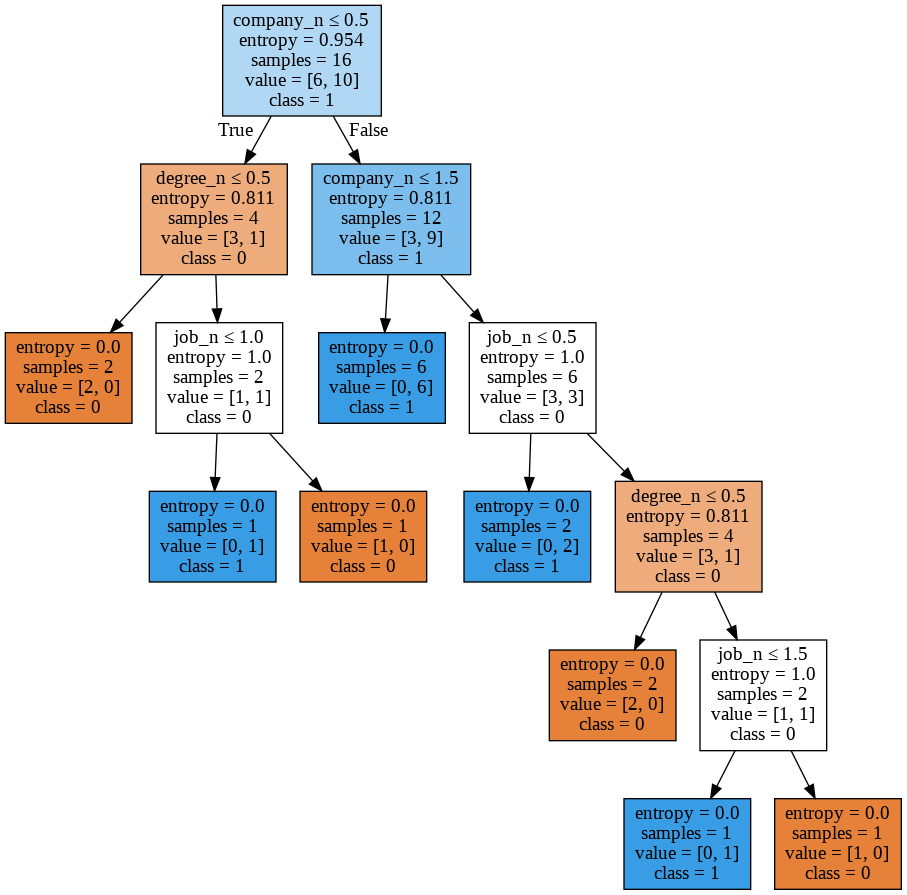

In [ ]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=False,
                special_characters=True,feature_names = ['company_n', 'job_n', 'degree_n'],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

**Exercise 1**

Exercise: Build decision tree model to predict survival based on certain parameters in Titanic dataset ([link](https://github.com/codebasics/py/blob/master/ML/9_decision_tree/Exercise/titanic.csv))

Use following columns build a model to predict if person would survive or not,
1. Pclass
2. Sex
3. Age
4. Fare

Calculate score of your model and also visualize the resulting Decision Tree.


**Exercise 2**

Exercise: Build decision tree model to predict whether a tumor is malignant or benign based on the following features:

1. the mean radius of the tumor (radius_mean) 
2. its mean number of concave points (concave points_mean).

Calculate score of your model and also visualize the resulting Decision Tree.
